<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Clustering_of_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering of Books**

In [ ]:
import random 
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords,gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit,KFold,cross_val_score,train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp    
from sklearn.metrics import cohen_kappa_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score
from tqdm import tqdm
#___________________________________________ Setup ___________________________________
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.corpus.gutenberg.fileids()
print("Done")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Done


In [ ]:
!gdown --id 114E2wVaolABUqC9TGjeb7DkWNqsAIkpi #Load Uncle Tom_s Cabin.txt
!gdown --id 1hu8zXFdOKmFjTeWPpl9491Gu7snvhqPf #Load A Factor of Evolution.txt
!gdown --id 14_7QMFga54PpCVDgfUNuAP87dlPyIVVm #Load From the Caves and Jungles of Hindostan.txt
!gdown --id 1FWQVLisqSowkUJohoiiC2k4SxE5eHQn2 #Load Anarchism and Other Essays.txt
!gdown --id 1F2igr8ZaeON4909ULTCA9EW7z9Y3Tp5Z #Load Criminal Psychology.txt

Downloading...
From: https://drive.google.com/uc?id=114E2wVaolABUqC9TGjeb7DkWNqsAIkpi
To: /content/Uncle Tom_s Cabin.txt
100% 1.03M/1.03M [00:00<00:00, 67.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hu8zXFdOKmFjTeWPpl9491Gu7snvhqPf
To: /content/A Factor of Evolution.txt
100% 577k/577k [00:00<00:00, 81.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=14_7QMFga54PpCVDgfUNuAP87dlPyIVVm
To: /content/From the Caves and Jungles of Hindostan.txt
100% 559k/559k [00:00<00:00, 75.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FWQVLisqSowkUJohoiiC2k4SxE5eHQn2
To: /content/Anarchism and Other Essays.txt
100% 412k/412k [00:00<00:00, 60.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F2igr8ZaeON4909ULTCA9EW7z9Y3Tp5Z
To: /content/Criminal Psychology.txt
100% 1.30M/1.30M [00:00<00:00, 81.6MB/s]


# The function and add random partitions,So now the output of this function is 200 random part of one book  

In [ ]:
def partitioning_books(book_name):
    text =open(book_name,"r+")
    text=text.readlines()#.split("\n")
    txt=[]
    for line in text:
      txt.append(line.replace("\n",''))
    filtered=[]
    words=[]
    book=[]
    rand_parts=[]
    arranged=0
    #nltk.download('gutenberg')
    #nltk.download('stopwords')
    tk =re.sub(r'[^\w\s]', '', str(txt).lower().strip())
    ## Tokenize (convert from string to list)
    Tokenized_words =  tk.split()
    ## remove Stopwords
    stop_words=set(stopwords.words("english"))

    for w in Tokenized_words:
          if w not in stop_words:
              filtered.append(w)        
    i = 0 
    ## Stemming (remove -ing, -ly, ...)
    ps = nltk.stem.porter.PorterStemmer()
    filtered = [ps.stem(word) for word in filtered]
    ## Lemmatisation (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    filtered = [lem.lemmatize(word) for word in filtered]
    for Q in filtered:  
            words.append(Q)
            i+=1           
            if i == 150:                
                i = 0
                words.append("|")

    arranged = " ".join(words)
  #Creat the random partitions
    parts=arranged.split("|")
          
    for y in range(len(parts)):
        book.append((book_name[:book_name.index(".")]))
    random.seed(42)  
    for q in random.sample(range(0,len(parts)),200):
      rand_parts.append(parts[q])   
    df = pd.DataFrame(([xx,yy] for xx, yy in zip(rand_parts,book)),columns = ["Partitions","Author"])
    #df.to_csv(str(book_name)+".csv")
    return df



In [ ]:
names_book=["Uncle Tom_s Cabin.txt","Anarchism and Other Essays.txt",'Criminal Psychology.txt','From the Caves and Jungles of Hindostan.txt','A Factor of Evolution.txt']
merged_df=pd.DataFrame()
for i in tqdm(names_book):
  merged_df=merged_df.append(partitioning_books(i))
merged_df.to_csv("Total_data.csv")
print("\nDone")

100%|██████████| 5/5 [00:12<00:00,  2.44s/it]


Done


In [ ]:
merged_df['word_count'] = merged_df["Partitions"].apply(lambda x: len(str(x).split()))
merged_df['char_count'] = merged_df["Partitions"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
merged_df['sentence_count'] = merged_df["Partitions"].apply(lambda x: len(str(x).split(".")))
merged_df['avg_word_length'] = merged_df['char_count'] / merged_df['word_count']
merged_df['avg_sentence_lenght'] = merged_df['word_count'] / merged_df['sentence_count']
merged_df.sample(5)

Partitions  ... avg_sentence_lenght
199   recal use quickli purpos instrument name word...  ...               150.0
96    old fellow downi wont masr georg must talk lo...  ...               150.0
111   child went hotel henri told sold planter pear...  ...               150.0
16    work42 appear howev affirm gross exagger more...  ...               150.0
174   prepar epicur could find fault season incipi ...  ...               150.0

[5 rows x 7 columns]

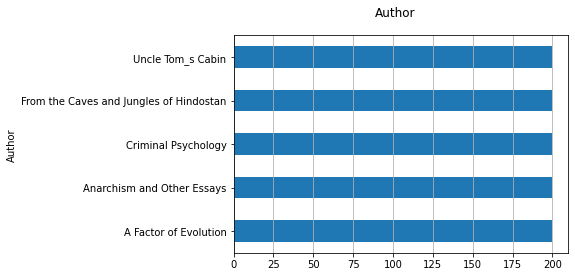

In [ ]:
x = "Author"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
merged_df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
corpus = merged_df[merged_df["Author"]=="Uncle Tom_s Cabin"]["Partitions"]
type(corpus[0])

str

In [ ]:
# Most frequent words Function
top=10
nltk.download('punkt')
## for vectorizer
from sklearn import feature_extraction, manifold
def Most_freq(y):
  corpus = merged_df[merged_df["Author"]==y]["Partitions"]
  lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
  fig, ax = plt.subplots(nrows=1, ncols=2)
  fig.suptitle("Most frequent words for "+y, fontsize=15)
      
  ## unigrams
  dic_words_freq = nltk.FreqDist(lst_tokens)
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
  ax[0].set(ylabel=None)
  ## bigrams
  dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
  dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
  dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
  ax[1].set(ylabel=None)
  plt.show()
  wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                          max_font_size=35)
  wc = wc.generate(str(corpus))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


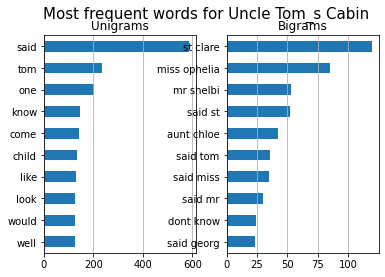

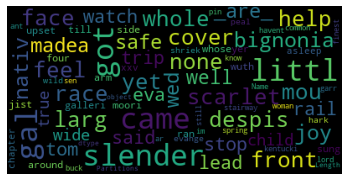

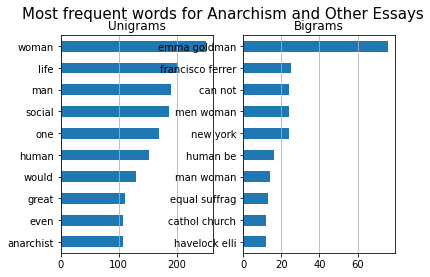

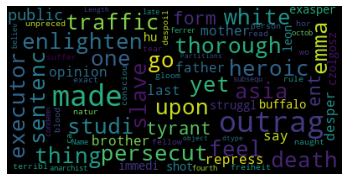

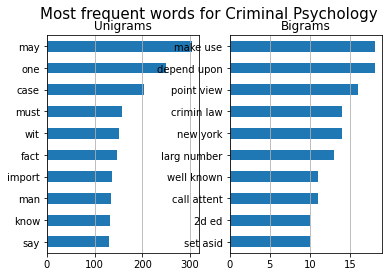

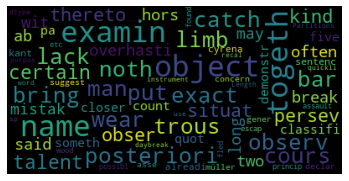

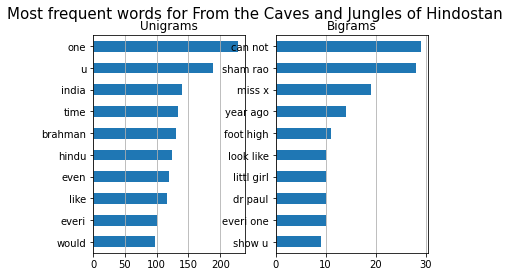

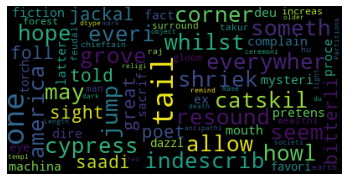

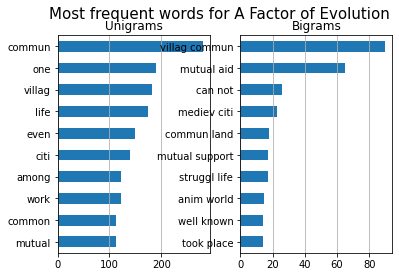

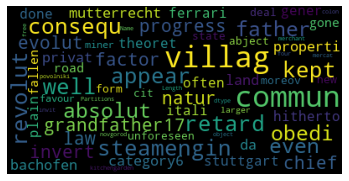

In [ ]:
Most_freq("Uncle Tom_s Cabin")
Most_freq('Anarchism and Other Essays')
Most_freq('Criminal Psychology')
Most_freq('From the Caves and Jungles of Hindostan')
Most_freq('A Factor of Evolution')

#Text transformation

In [ ]:
X, y = merged_df["Partitions"],merged_df["Author"]

#Function for labelling

In [ ]:
names=["Uncle Tom_s Cabin","Anarchism and Other Essays",'Criminal Psychology','From the Caves and Jungles of Hindostan','A Factor of Evolution']

In [ ]:
#Function for labelling
def label(labels,lab_name):
  l_1,l_2,l_3,l_4,l_5=[],[],[],[],[]
  num=0
  for j in range(5):
    C0,C1,C2,C3,C4=0,0,0,0,0
    l,clas=[],[]
    if num > len(labels):
      break
    else:
      for i in range(200):
        
        if labels[i+num]==0:
          C0+=1
        if labels[i+num]==1:
          C1+=1
        if labels[i+num]==2:
          C2+=1
        if labels[i+num]==3:
          C3+=1
        if labels[i+num]==4:
          C4+=1
      num=num+200
      l.append(C0)
      l.append(C1)
      l.append(C2)
      l.append(C3)
      l.append(C4)
      if j ==0:
        l_1.append(l)
      elif j==1:
        l_2.append(l)
      elif j ==2:
        l_3.append(l)
      elif j==3:
        l_4.append(l)
      else :
        l_5.append(l)
  clas.append(l_1[0].index(max(l_1[0])))
  clas.append(l_2[0].index(max(l_2[0])))
  clas.append(l_3[0].index(max(l_3[0])))
  clas.append(l_4[0].index(max(l_4[0])))
  clas.append(l_5[0].index(max(l_5[0])))
  df = pd.DataFrame(([xx,yy] for xx, yy in zip(lab_name,clas)),columns = ["Book Name","Label"])
  print(df)
  return l_1,l_2,l_3,l_4,l_5

**Transformation** 

In [ ]:
# BOW transformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X).todense()
#print(X_train_counts)
print("Data dimensions before PCA with BOW:",X_train_counts.shape)
from sklearn.decomposition import PCA
#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(X_train_counts)
BOW_2Dtransformed_data=pca.transform(X_train_counts)
print("Data dimensions after PCA with BOW:",BOW_2Dtransformed_data.shape)
#print(BOW_2Dtransformed_data)

Data dimensions before PCA with BOW: (1000, 15572)
Data dimensions after PCA with BOW: (1000, 2)


In [ ]:
#TF-IDF transform
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tfidf = tf_transformer.transform(X_train_counts).todense()
print("Data dimensions before PCA with TFIDF and BOW:",X_train_tfidf.shape)

pca = PCA(n_components=2)
pca.fit(X_train_tfidf)
tfidf_2Dtransformed_data=pca.transform(X_train_tfidf)
print("Data dimensions after PCA with TFIDF and BOW:",tfidf_2Dtransformed_data.shape)
#print(tfidf_2Dtransformed_data)

Data dimensions before PCA with TFIDF and BOW: (1000, 15572)
Data dimensions after PCA with TFIDF and BOW: (1000, 2)


In [ ]:
#LDA Transform
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=0) 
LDA_out= lda.fit_transform(X_train_counts)
print("Data dimensions before PCA with LDA and BOW:",LDA_out.shape)
#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(LDA_out)
LDA_2Dtransformed_data=pca.transform(LDA_out)
print("Data dimensions after PCA with LDA and BOW:",LDA_2Dtransformed_data.shape)
#print(LDA_2Dtransformed_data)

Data dimensions before PCA with LDA and BOW: (1000, 5)
Data dimensions after PCA with LDA and BOW: (1000, 2)


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim

data = [d for d in X]
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
data_tagged = list(tagged_document(data))

max_epochs = 150
vec_size = 40
alpha = 0.025

d2v_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
Xd2v=d2v_model.docvecs.doctag_syn0
d2v_model.build_vocab(data_tagged)
d2v_model.train(data_tagged, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
Xd2v=d2v_model.docvecs.doctag_syn0

Xd2v
type(Xd2v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).


numpy.ndarray


---
  **k-mean** Algorithm



---




**K-mean** with **TF-IDF** and **BOW**

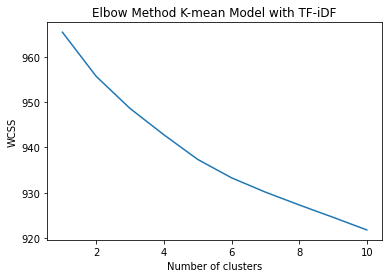

[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 2 1 0 1 1 1 1
 1 1 2 1 1 0 0 1 1 1 0 1 1 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 4 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4
 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4 2 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4
 4 4 4 4 4 4 4 4 2 4 4 4 

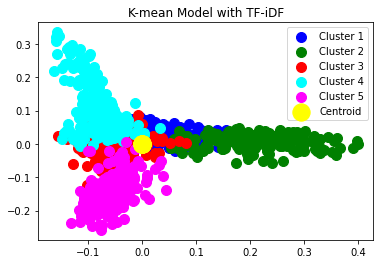



                                 Book Name  Label
0                        Uncle Tom_s Cabin      1
1               Anarchism and Other Essays      2
2                      Criminal Psychology      4
3  From the Caves and Jungles of Hindostan      0
4                    A Factor of Evolution      3
([[36, 156, 7, 0, 1]], [[2, 0, 197, 0, 1]], [[1, 0, 9, 0, 190]], [[188, 0, 3, 0, 9]], [[2, 0, 9, 186, 3]])


Accuracy for model with K-mean BOW and Tf-IDF :->  0.917
Kappa for model with K-mean BOW and Tf-IDF :->  0.89625
For n_clusters = 5 The average silhouette_score with tfidf and BOW is : 0.012656851779873317


In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_tfidf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method K-mean Model with TF-iDF')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=0)
pred_y = kmeans.fit_predict(X_train_tfidf)
#plt.scatter(X_train_tfidf[:,0], X_train_tfidf[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

y_predict= kmeans.fit_predict(X_train_tfidf)  
print(y_predict)

mtp.scatter(tfidf_2Dtransformed_data[y_predict == 0, 0], tfidf_2Dtransformed_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 1, 0], tfidf_2Dtransformed_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 2, 0], tfidf_2Dtransformed_data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 3, 0], tfidf_2Dtransformed_data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(tfidf_2Dtransformed_data[y_predict == 4, 0], tfidf_2Dtransformed_data[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('K-mean Model with TF-iDF')  
  
mtp.legend()  
mtp.show() 
#_____________________
print("\n")
print(label(y_predict,names))
print("\n")
#__________________________ 
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(1)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(2)
  elif yy[i]=="Criminal Psychology":
    x.append(4)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(0)
  else :
    x.append(3)
print("Accuracy for model with K-mean BOW and Tf-IDF :-> ",np.mean(y_predict == x))

print("Kappa for model with K-mean BOW and Tf-IDF :-> " , cohen_kappa_score(y_predict,x))

silhouette_avg = silhouette_score(X_train_tfidf , y_predict)
print("For n_clusters =", 5,
      "The average silhouette_score with tfidf and BOW is :", silhouette_avg) # 0>> means overlapped clusters



**K-mean** with **BOW**

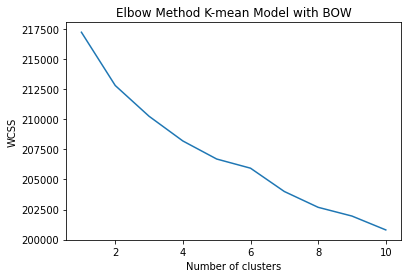

[4 1 4 4 1 4 1 4 4 4 4 4 4 1 4 1 4 4 1 1 4 4 4 4 4 4 1 1 1 4 1 4 1 4 4 1 4
 4 4 4 1 1 1 4 4 1 4 4 1 4 4 4 1 4 4 4 1 4 4 4 4 4 4 1 4 4 4 1 4 1 4 4 1 4
 1 4 1 4 4 4 1 1 1 1 1 4 4 1 4 1 1 4 4 4 4 4 4 4 4 4 1 4 4 1 4 1 1 4 4 1 1
 1 4 4 4 4 1 1 4 4 4 4 4 1 1 4 4 1 4 4 1 4 1 4 4 4 4 1 1 4 4 4 4 4 4 4 4 1
 4 4 4 4 1 4 1 4 4 1 1 4 4 1 4 4 4 4 1 4 4 4 1 4 4 1 1 1 4 4 4 4 4 4 4 4 4
 4 4 4 1 4 4 1 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 2 2 2
 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 0 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 1 2 2 2 

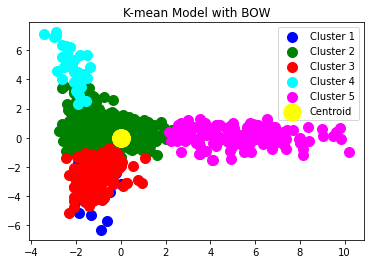



                                 Book Name  Label
0                        Uncle Tom_s Cabin      4
1               Anarchism and Other Essays      1
2                      Criminal Psychology      2
3  From the Caves and Jungles of Hindostan      1
4                    A Factor of Evolution      1
([[0, 63, 0, 0, 137]], [[26, 172, 2, 0, 0]], [[10, 14, 176, 0, 0]], [[4, 191, 4, 0, 1]], [[0, 159, 1, 39, 1]])


Accuracy for K-mean model with BOW  :->  0.569
Kappa for K-mean model with BOW :->  0.46125000000000005
For n_clusters = 5 The average silhouette_score with  BOW is : 0.027820359332424105


In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_counts)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method K-mean Model with BOW')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=0)
pred_y = kmeans.fit_predict(X_train_counts)
#plt.scatter(BOW[:,0], BOW[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

y_predict= kmeans.fit_predict(X_train_counts)  
print(y_predict)

mtp.scatter(BOW_2Dtransformed_data[y_predict == 0, 0], BOW_2Dtransformed_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 1, 0], BOW_2Dtransformed_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 2, 0], BOW_2Dtransformed_data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 3, 0], BOW_2Dtransformed_data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(BOW_2Dtransformed_data[y_predict == 4, 0], BOW_2Dtransformed_data[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('K-mean Model with BOW')  
  
mtp.legend()  
mtp.show()  
#_____________________
print("\n")
print(label(y_predict,names))
print("\n")
#__________________________
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(4)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(2)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(1)
  else :
    x.append(3)
print("Accuracy for K-mean model with BOW  :-> ",np.mean(y_predict == x))
#wwqprint(metrics.classification_report(y_hc , y ))

print("Kappa for K-mean model with BOW :-> " , cohen_kappa_score(y_predict,x))

silhouette_avg = silhouette_score(X_train_counts , y_predict)
print("For n_clusters =", 5,
      "The average silhouette_score with  BOW is :", silhouette_avg) # 0>> means overlapped clusters


**K-mean** with **LDA**

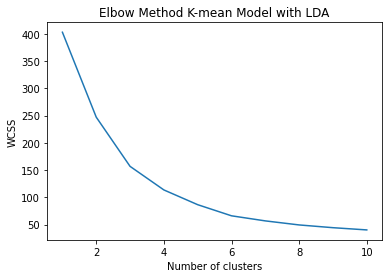

[2 4 2 2 4 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 4 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 0 2 4 2 2 2 2
 2 2 2 2 2 4 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 3 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 0 0 0 2 0 2 0 2 0 2 0 2 2 2 2 0 0 2
 0 2 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 4 2 2 2 0 4 0 2 2 0 2 0 2 0 0 4
 0 2 0 0 2 0 0 2 1 0 0 2 2 2 0 2 2 2 0 2 0 0 2 2 0 0 2 0 0 0 0 2 2 2 0 2 2
 0 2 2 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 3 0 2 2 0 0 0 2 2 0 0 0 1 2 2 2 0 0 0
 2 0 0 0 0 0 0 0 2 2 0 1 0 0 0 2 0 0 2 2 2 2 2 4 4 0 2 0 0 0 0 0 0 0 0 0 2
 4 0 0 0 2 2 0 2 2 0 2 3 2 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0
 0 0 0 0 0 0 0 0 1 0 0 0 

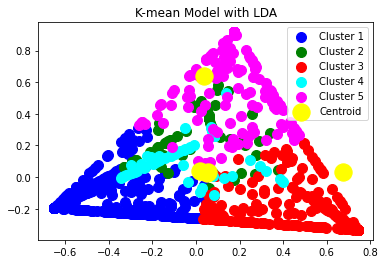



                                 Book Name  Label
0                        Uncle Tom_s Cabin      2
1               Anarchism and Other Essays      0
2                      Criminal Psychology      0
3  From the Caves and Jungles of Hindostan      4
4                    A Factor of Evolution      0
([[4, 1, 184, 5, 6]], [[110, 4, 77, 3, 6]], [[175, 21, 1, 3, 0]], [[22, 12, 24, 1, 141]], [[86, 36, 13, 56, 9]])


Accuracy for K-mean model with BOW and lda :->  0.512
Kappa for K-mean model with BOW and lda :->  0.39
For n_clusters = 5 The average silhouette_score with LDA and BOW is : 0.533548240664805


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(LDA_out)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method K-mean Model with LDA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=0)
pred_y = kmeans.fit_predict(LDA_out)
#plt.scatter(LDA_out[:,0], LDA_out[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#plt.show()

y_predict= kmeans.fit_predict(LDA_out)  
print(y_predict)

mtp.scatter(LDA_2Dtransformed_data[y_predict == 0, 0], LDA_2Dtransformed_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 1, 0], LDA_2Dtransformed_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 2, 0], LDA_2Dtransformed_data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 3, 0], LDA_2Dtransformed_data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 4, 0], LDA_2Dtransformed_data[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('K-mean Model with LDA')  
  
mtp.legend()  
mtp.show()  
#_____________________
print("\n")
print(label(y_predict,names))
print("\n")
#__________________________
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(2)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(1)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(3)
print("Accuracy for K-mean model with BOW and lda :-> ",np.mean(y_predict == x))
#wwqprint(metrics.classification_report(y_hc , y ))
from sklearn.metrics import cohen_kappa_score

print("Kappa for K-mean model with BOW and lda :-> " , cohen_kappa_score(y_predict,x))

silhouette_avg = silhouette_score(LDA_out , y_predict)
print("For n_clusters =", 5,
      "The average silhouette_score with LDA and BOW is :", silhouette_avg) # 0>> means overlapped clusters

  **hierarchical clustering || AgglomerativeClustering** Algorithm


**k-mean** with **dec2vec**

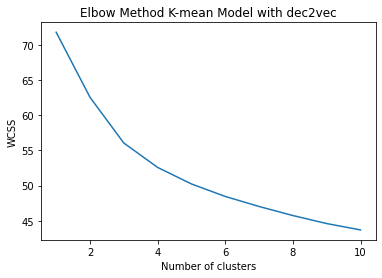

[4 4 3 1 0 1 2 1 1 2 1 1 1 4 1 1 1 4 0 0 0 1 4 4 1 1 0 4 1 1 1 4 2 1 4 0 4
 0 4 4 4 0 0 2 0 1 1 4 2 0 0 4 4 0 1 4 4 2 1 4 1 1 1 2 1 1 1 2 1 4 4 1 2 4
 2 4 2 4 0 0 1 4 4 2 4 4 4 2 0 1 0 4 2 4 1 4 1 0 4 4 0 4 0 2 4 2 0 1 1 0 0
 4 4 0 0 2 0 2 1 2 4 1 4 0 4 4 4 2 4 1 2 0 2 1 4 0 0 4 0 2 1 1 1 1 0 1 2 1
 0 2 0 2 1 4 4 2 1 0 4 4 4 2 1 3 4 1 4 4 4 0 1 4 1 2 2 2 4 0 1 1 2 2 0 4 4
 4 1 4 2 4 4 4 0 4 0 4 4 1 4 2 2 2 2 0 2 2 2 2 2 2 3 0 0 0 0 2 0 2 2 0 4 2
 3 2 2 4 2 3 0 2 3 4 2 2 2 0 4 4 2 0 4 0 4 1 2 1 0 2 2 0 4 0 0 1 0 4 4 2 4
 4 4 4 2 3 2 2 2 2 2 2 0 0 2 1 4 4 1 0 0 0 2 2 0 0 2 1 0 2 0 4 1 0 3 4 1 0
 2 4 0 4 4 2 2 4 3 2 2 2 0 0 0 0 4 3 2 0 1 2 2 1 0 0 4 4 4 4 0 1 4 3 4 0 2
 4 0 2 0 2 2 2 0 1 2 4 3 4 2 4 2 3 4 1 0 4 4 4 1 4 4 0 4 0 2 0 4 2 0 2 2 0
 4 2 0 0 0 0 4 2 0 4 1 3 2 2 4 4 0 3 4 0 0 0 3 4 3 2 4 2 2 4 2 2 2 1 3 3 0
 2 3 4 0 3 4 3 1 1 2 4 4 0 0 0 0 1 3 4 2 0 3 4 2 0 3 1 4 2 1 3 0 1 2 0 3 2
 0 2 0 2 0 2 0 1 1 1 3 2 4 2 0 4 4 4 2 4 0 1 0 1 3 1 2 0 3 2 1 3 1 3 4 3 2
 1 2 3 0 0 2 2 1 3 4 4 0 

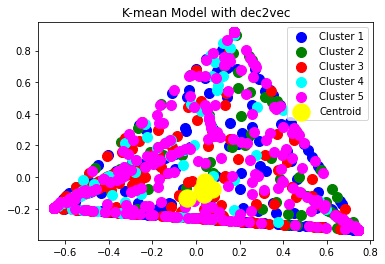



                                 Book Name  Label
0                        Uncle Tom_s Cabin      4
1               Anarchism and Other Essays      2
2                      Criminal Psychology      0
3  From the Caves and Jungles of Hindostan      4
4                    A Factor of Evolution      4
([[40, 55, 35, 2, 68]], [[55, 15, 65, 15, 50]], [[49, 35, 45, 28, 43]], [[48, 35, 32, 10, 75]], [[43, 22, 37, 39, 59]])


Accuracy for K-mean model with BOW and lda :->  0.239
Kappa for K-mean model with BOW and lda :->  0.04874999999999996
For n_clusters = 5 The average silhouette_score with LDA and BOW is : -0.07680016225313335


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Xd2v)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method K-mean Model with dec2vec')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=0)
pred_y = kmeans.fit_predict(Xd2v)
#plt.scatter(LDA_out[:,0], LDA_out[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#plt.show()

y_predict= kmeans.fit_predict(Xd2v)  
print(y_predict)

mtp.scatter(LDA_2Dtransformed_data[y_predict == 0, 0], LDA_2Dtransformed_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 1, 0], LDA_2Dtransformed_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 2, 0], LDA_2Dtransformed_data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 3, 0], LDA_2Dtransformed_data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(LDA_2Dtransformed_data[y_predict == 4, 0], LDA_2Dtransformed_data[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('K-mean Model with dec2vec')  
mtp.legend()  
mtp.show()  
#_____________________
print("\n")
print(label(y_predict,names))
print("\n")
#__________________________
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(2)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(1)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(3)
print("Accuracy for K-mean model with BOW and lda :-> ",np.mean(y_predict == x))
#wwqprint(metrics.classification_report(y_hc , y ))
from sklearn.metrics import cohen_kappa_score

print("Kappa for K-mean model with BOW and lda :-> " , cohen_kappa_score(y_predict,x))

silhouette_avg = silhouette_score(LDA_out , y_predict)
print("For n_clusters =", 5,
      "The average silhouette_score with LDA and BOW is :", silhouette_avg) # 0>> means overlapped clusters

**AgglomerativeClustering with BOW**


BOW [0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0
 0 0 0 0 4 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 4 0
 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0
 0 0 4 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 0 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 0 4 2 0 2 2 0 0 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2
 0 2 2 2 2 2 2 2 0 2 

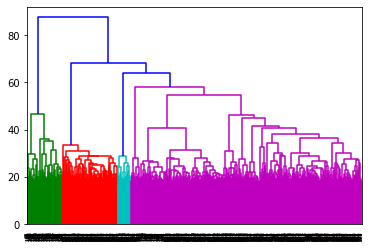

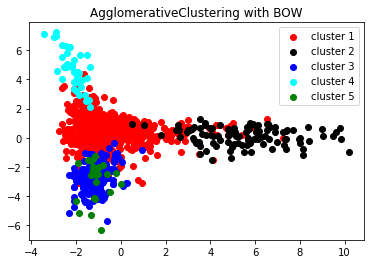



                                 Book Name  Label
0                        Uncle Tom_s Cabin      1
1               Anarchism and Other Essays      0
2                      Criminal Psychology      2
3  From the Caves and Jungles of Hindostan      0
4                    A Factor of Evolution      0
([[94, 106, 0, 0, 0]], [[181, 0, 0, 0, 19]], [[31, 0, 162, 0, 7]], [[197, 0, 3, 0, 0]], [[159, 1, 0, 40, 0]])


Accuracy for AgglomerativeClustering model with BOW compared by label:->  0.524
Kappa for AgglomerativeClustering model with BOW :->  0.405
For n_clusters = 5 The average silhouette_score with  BOW is : 0.026259282314717282


In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

#______________BOW___________________________
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_train_counts, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_train_counts)
print("BOW",y_hc)
plt.show()
plt.scatter(BOW_2Dtransformed_data[y_hc ==0,0], BOW_2Dtransformed_data[y_hc == 0,1],  c='red',label="cluster 1")
plt.scatter(BOW_2Dtransformed_data[y_hc==1,0], BOW_2Dtransformed_data[y_hc == 1,1],  c='black',label="cluster 2")
plt.scatter(BOW_2Dtransformed_data[y_hc ==2,0], BOW_2Dtransformed_data[y_hc == 2,1], c='blue', label="cluster 3")
plt.scatter(BOW_2Dtransformed_data[y_hc ==3,0], BOW_2Dtransformed_data[y_hc == 3,1],  c='cyan', label= "cluster 4")
plt.scatter(BOW_2Dtransformed_data[y_hc ==4,0], BOW_2Dtransformed_data[y_hc == 4,1],  c='green',label= "cluster 5")
plt.title('AgglomerativeClustering with BOW')  
plt.legend()
plt.show()
#_____________________
print("\n")
print(label(y_hc,names))
print("\n")
#__________________________


yy = y.tolist()
x=[]
for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(1)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(4)
  elif yy[i]=="Criminal Psychology":
    x.append(2)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(0)
  else :
    x.append(3)
print("Accuracy for AgglomerativeClustering model with BOW compared by label:-> ",np.mean(y_hc == x))
print("Kappa for AgglomerativeClustering model with BOW :-> " , cohen_kappa_score(y_hc,x))

silhouette_avg = silhouette_score(X_train_counts , y_hc)
print("For n_clusters =", 5,
      "The average silhouette_score with  BOW is :", silhouette_avg) # 0>> means overlapped clusters


**AgglomerativeClustering with LDA and BOW**






LDA [2 0 2 2 3 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 3 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 0 2 3 2 2 2 2
 0 2 0 2 2 0 2 2 2 0 0 2 2 4 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 2 1 1 1 0 1 2 1 2 1 2 1 0 2 0 2 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 2 2 0 1 0 2 2 2 1 3 1 2 2 0 0 1 0 1 0 0
 1 0 0 1 2 1 1 0 4 1 0 0 0 0 0 0 0 2 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 2 0 2 0
 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 2 0 0 0 1 2 0 1 0 1 0 2 0 0 1 0 1
 0 1 1 0 1 1 1 1 2 0 1 4 1 0 1 0 1 1 2 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 2
 1 1 0 1 2 0 1 0 0 1 2 0 0 0 0 2 2 1 1 1 1 0 0 2 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 1 1 1 1 4 4 1 1 1 4 4 4 1 1 1 1
 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
 1 1 1 1 1 1 1 1 4 1 

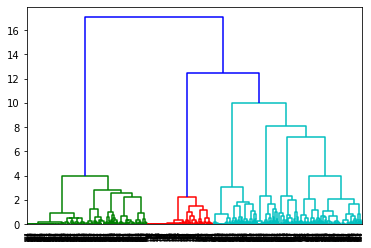

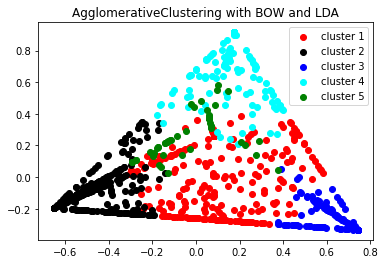



                                 Book Name  Label
0                        Uncle Tom_s Cabin      2
1               Anarchism and Other Essays      0
2                      Criminal Psychology      1
3  From the Caves and Jungles of Hindostan      3
4                    A Factor of Evolution      1
([[30, 0, 166, 3, 1]], [[88, 81, 28, 1, 2]], [[8, 172, 0, 0, 20]], [[49, 24, 3, 118, 6]], [[75, 82, 1, 8, 34]])


Accuracy AgglomerativeClustering model with  BOW and LDA campared by labels :->  0.578
Kappa for AgglomerativeClustering model with BOW and LDA :->  0.47250000000000003
For n_clusters = 5 The average silhouette_score with LDA and BOW is : 0.4641530724049276


In [ ]:
#______________________with LDA_____________________
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(LDA_out, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(LDA_out)
print("LDA",y_hc)
plt.show()
plt.scatter(LDA_2Dtransformed_data[y_hc ==0,0], LDA_2Dtransformed_data[y_hc == 0,1],  c='red',label="cluster 1")
plt.scatter(LDA_2Dtransformed_data[y_hc==1,0], LDA_2Dtransformed_data[y_hc == 1,1],  c='black',label="cluster 2")
plt.scatter(LDA_2Dtransformed_data[y_hc ==2,0], LDA_2Dtransformed_data[y_hc == 2,1], c='blue',label="cluster 3")
plt.scatter(LDA_2Dtransformed_data[y_hc ==3,0], LDA_2Dtransformed_data[y_hc == 3,1],  c='cyan',label="cluster 4")
plt.scatter(LDA_2Dtransformed_data[y_hc ==4,0], LDA_2Dtransformed_data[y_hc == 4,1],  c='green',label="cluster 5")
plt.title('AgglomerativeClustering with BOW and LDA')  
plt.legend()
plt.show()

#_____________________
print("\n")
print(label(y_hc,names))
print("\n")
#__________________________

yy = y.tolist()
x=[]
for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(2)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(1)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(3)
  else :
    x.append(4)
print("Accuracy AgglomerativeClustering model with  BOW and LDA campared by labels :-> ",np.mean(y_hc == x))
print("Kappa for AgglomerativeClustering model with BOW and LDA :-> " , cohen_kappa_score(y_hc,x))

silhouette_avg = silhouette_score(LDA_out , y_hc)
print("For n_clusters =", 5,
      "The average silhouette_score with LDA and BOW is :", silhouette_avg) # 0>> means overlapped clusters

**AgglomerativeClustering with TFidf and BOW**





Tfidf [1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 0 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0 3 2 3 2 2 2 3 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 0 2
 0 2 2 2 2 2 2 2 0 

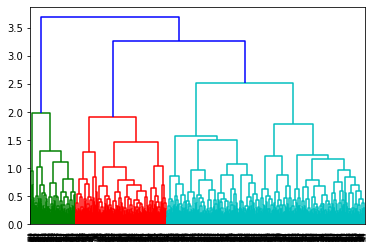

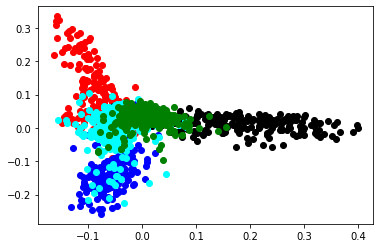



                                 Book Name  Label
0                        Uncle Tom_s Cabin      1
1               Anarchism and Other Essays      3
2                      Criminal Psychology      2
3  From the Caves and Jungles of Hindostan      4
4                    A Factor of Evolution      0
([[0, 191, 0, 1, 8]], [[0, 1, 4, 194, 1]], [[9, 0, 170, 20, 1]], [[1, 0, 2, 4, 193]], [[176, 2, 0, 19, 3]])


Accuracy AgglomerativeClustering model with  BOW and Tfidf campared by labels :->  0.924
Kappa for AgglomerativeClustering model with BOW and Tfidf :->  0.905
For n_clusters = 5 The average silhouette_score with tfidf and BOW is : 0.011698915391127393


In [ ]:
 import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#______________________with TFidf_____________________
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(Xd2v, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_train_tfidf)
print("Tfidf",y_hc)
plt.show()
plt.scatter(tfidf_2Dtransformed_data[y_hc ==0,0], tfidf_2Dtransformed_data[y_hc == 0,1],  c='red',label="cluster 1")
plt.scatter(tfidf_2Dtransformed_data[y_hc==1,0], tfidf_2Dtransformed_data[y_hc == 1,1],  c='black',label="cluster 1")
plt.scatter(tfidf_2Dtransformed_data[y_hc ==2,0], tfidf_2Dtransformed_data[y_hc == 2,1], c='blue',label="cluster 1")
plt.scatter(tfidf_2Dtransformed_data[y_hc ==3,0], tfidf_2Dtransformed_data[y_hc == 3,1],  c='cyan',label="cluster 1")
plt.scatter(tfidf_2Dtransformed_data[y_hc ==4,0], tfidf_2Dtransformed_data[y_hc == 4,1],  c='green',label="cluster 1")
plt.title('AgglomerativeClustering with BOW and Tfidf')  
plt.legend()
plt.show()
#______________________
print("\n")
print(label(y_hc,names))
print("\n")
#__________________________
yy = y.tolist()
x=[]
for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(1)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(3)
  elif yy[i]=="Criminal Psychology":
    x.append(2)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(0)

print("Accuracy AgglomerativeClustering model with  BOW and Tfidf campared by labels :-> ",np.mean(y_hc == x))
print("Kappa for AgglomerativeClustering model with BOW and Tfidf :-> " , cohen_kappa_score(y_hc,x))

silhouette_avg = silhouette_score(X_train_tfidf , y_hc)
print("For n_clusters =", 5,
      "The average silhouette_score with tfidf and BOW is :", silhouette_avg) # 0>> means overlapped clusters

**AgglomerativeClustering with doc2vec**


d2v [0 0 2 0 3 0 3 0 0 1 0 0 0 0 0 0 0 0 3 0 3 0 1 1 0 0 3 0 0 0 0 0 1 0 1 3 0
 3 2 0 0 3 3 1 3 0 0 0 1 3 3 0 0 2 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1
 3 0 3 3 3 3 0 1 1 1 1 0 1 1 3 0 3 0 1 0 0 1 0 3 0 1 3 0 3 1 0 1 3 0 0 3 3
 0 0 3 1 1 3 3 0 1 1 3 1 3 0 0 0 3 3 1 1 3 3 0 3 2 1 1 1 1 0 1 0 0 3 1 3 0
 3 1 3 1 0 1 0 1 0 3 1 0 1 1 0 2 0 0 3 3 0 3 0 1 1 3 3 3 3 3 0 1 3 3 3 0 1
 1 3 0 1 3 0 3 3 2 3 0 1 0 1 1 1 1 1 3 1 1 1 3 1 2 2 3 3 2 3 1 3 1 1 3 3 1
 2 1 1 3 1 4 3 1 2 0 1 1 1 1 0 1 1 3 0 3 1 0 2 3 1 1 3 1 0 1 3 2 3 0 1 1 1
 3 1 1 1 0 1 1 1 1 1 1 3 3 2 0 0 1 0 3 0 3 1 1 3 1 3 0 3 1 3 1 1 3 2 0 0 3
 1 1 3 1 0 1 1 1 2 1 1 3 3 1 3 3 1 2 1 3 0 2 1 0 3 0 1 1 0 2 3 0 1 2 0 3 1
 3 3 1 3 1 3 1 3 1 1 1 4 1 1 1 1 2 1 0 3 0 1 0 0 3 3 3 1 3 1 3 1 1 2 1 1 3
 0 1 3 3 3 3 0 2 3 1 2 2 1 1 1 3 3 2 1 3 3 1 2 0 2 3 1 1 1 2 1 1 3 0 2 2 3
 1 2 0 1 4 1 2 1 3 1 0 1 1 3 2 3 0 2 0 1 3 4 1 1 1 4 0 2 1 0 2 3 0 1 3 2 1
 3 1 3 1 3 1 2 0 0 3 2 1 0 1 1 0 0 1 3 0 3 0 3 0 2 0 1 3 2 1 0 1 0 2 1 4 3
 1 1 2 3 0 3 3 0 4 1 

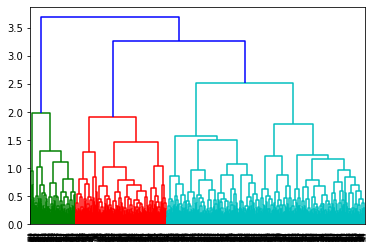

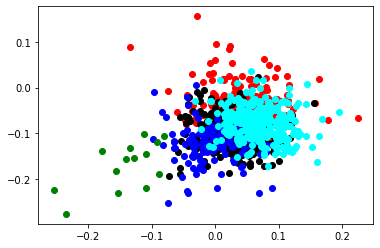



                                 Book Name  Label
0                        Uncle Tom_s Cabin      0
1               Anarchism and Other Essays      1
2                      Criminal Psychology      1
3  From the Caves and Jungles of Hindostan      0
4                    A Factor of Evolution      3
([[84, 54, 6, 56, 0]], [[28, 89, 23, 58, 2]], [[50, 64, 33, 47, 6]], [[62, 59, 19, 59, 1]], [[48, 48, 41, 58, 5]])


Accuracy AgglomerativeClustering model with  doc2vec campared by labels :->  0.17
Kappa for AgglomerativeClustering model with doc2vec :->  -0.03750000000000009
For n_clusters = 5 The average silhouette_score with doc2vec is : 0.06232444


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# import statements
import numpy as np
import matplotlib.pyplot as plt
#______________________with doc2vec_____________________
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(Xd2v, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(Xd2v)
print("d2v",y_hc)
plt.show()
plt.scatter(Xd2v[y_hc ==0,0], Xd2v[y_hc == 0,1],  c='red')
plt.scatter(Xd2v[y_hc==1,0], Xd2v[y_hc == 1,1],  c='black')
plt.scatter(Xd2v[y_hc ==2,0], Xd2v[y_hc == 2,1], c='blue')
plt.scatter(Xd2v[y_hc ==3,0], Xd2v[y_hc == 3,1],  c='cyan')
plt.scatter(Xd2v[y_hc ==4,0], Xd2v[y_hc == 4,1],  c='green')
plt.show()
#______________________
print("\n")
print(label(y_hc,names))
print("\n")
#__________________________
yy = y.tolist()
x=[]
for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(1)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(4)
  elif yy[i]=="Criminal Psychology":
    x.append(3)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(2)
  else :
    x.append(0)

print("Accuracy AgglomerativeClustering model with  doc2vec campared by labels :-> ",np.mean(y_hc == x))
print("Kappa for AgglomerativeClustering model with doc2vec :-> " , cohen_kappa_score(y_hc,x))

silhouette_avg = silhouette_score(Xd2v , y_hc)
print("For n_clusters =", 5,
      "The average silhouette_score with doc2vec is :", silhouette_avg) # 0>> means overlapped clusters

**Data Split** 


In [ ]:
Data_, y = merged_df["Partitions"],merged_df["Author"]
Data_.shape, y.shape

((1000,), (1000,))

#EM Alogrithim with BOW

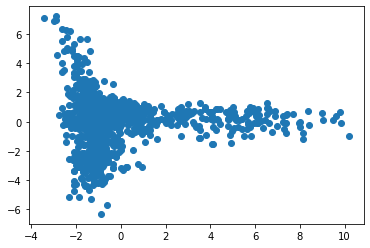

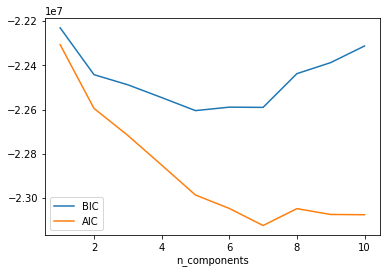

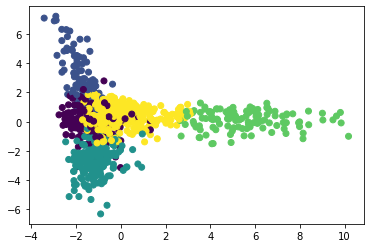



                                 Book Name  Label
0                        Uncle Tom_s Cabin      3
1               Anarchism and Other Essays      0
2                      Criminal Psychology      2
3  From the Caves and Jungles of Hindostan      4
4                    A Factor of Evolution      1


Accuracy for EM model with BOW  :->  0.77
Kappa for EM model with BOW  :->  0.7125
Homogeneity score for EM model with BOW  :->  0.5965021038450257
For n_clusters = 5 The average silhouette_score with  BOW is : 0.008879690310850303


In [ ]:
#EM Alogrithim with BOW
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import homogeneity_score
from sklearn.decomposition import LatentDirichletAllocation

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    #('LDA',LatentDirichletAllocation(n_components=5,random_state=0) ),
])        
X = pipeline.fit_transform(Data_).todense()
X = pd.DataFrame(X)
X=X.to_numpy()
pca = PCA(n_components=5).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='spherical', random_state=7).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

gmm = GaussianMixture(n_components=5, covariance_type='spherical', random_state=7)
gmm.fit(X)

labels = gmm.predict(X)
plt.scatter(data2D[:,0],data2D[:,1], c=labels, cmap='viridis');
plt.show()
#print(gmm.predict_proba(data2D))

#print(labels)
print("\n")
label(labels,names)
print("\n")
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(3)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(2)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(1)
print("Accuracy for EM model with BOW  :-> ",np.mean(labels == x))

print("Kappa for EM model with BOW  :-> " , cohen_kappa_score(labels,x))

print("Homogeneity score for EM model with BOW  :-> " , homogeneity_score(x, labels))


silhouette_avg = silhouette_score(X , labels)
print("For n_clusters =", 5,
      "The average silhouette_score with  BOW is :", silhouette_avg) # 0>> means overlapped clusters

#EM Alogrithim whith BOW & TFIDF


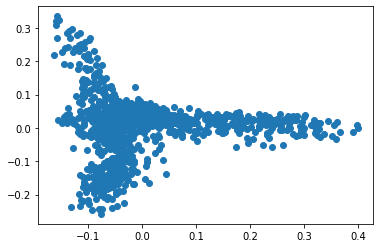

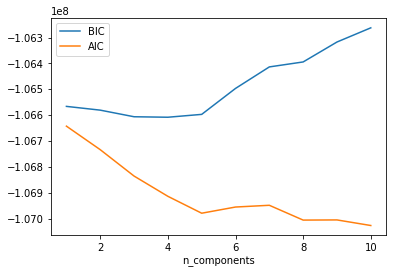

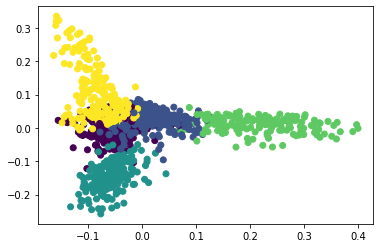



                                 Book Name  Label
0                        Uncle Tom_s Cabin      3
1               Anarchism and Other Essays      0
2                      Criminal Psychology      2
3  From the Caves and Jungles of Hindostan      1
4                    A Factor of Evolution      4


Accuracy for EM model with BOW and TFIDF :->  0.92
Kappa for EM model with BOW and TFIDF :->  0.9
Homogeneity score for EM model with BOW & TFIDF  :->  0.814823158492097
For n_clusters = 5 The average silhouette_score with tfidf and BOW is : 0.012718443577661326


In [ ]:
#EM Alogrithim whith BOW & TFIDF
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    #('LDA',LatentDirichletAllocation(n_components=5,random_state=0) ),
])        
X = pipeline.fit_transform(Data_).todense()
X = pd.DataFrame(X)
X=X.to_numpy()

pca = PCA(n_components=5,random_state=123).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='spherical', random_state=7).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

gmm = GaussianMixture(n_components=5, covariance_type='spherical', random_state=7)
gmm.fit(X)

labels = gmm.predict(X)
plt.scatter(data2D[:,0],data2D[:,1], c=labels, cmap='viridis');
plt.show()
#print(gmm.predict_proba(data2D))
print("\n")
label(labels,names)
print("\n")

x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(3)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(2)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(1)
  else :
    x.append(4)
print("Accuracy for EM model with BOW and TFIDF :-> ",np.mean(labels == x))

print("Kappa for EM model with BOW and TFIDF :-> " , cohen_kappa_score(labels,x))

print("Homogeneity score for EM model with BOW & TFIDF  :-> " , homogeneity_score(x, labels))

silhouette_avg = silhouette_score(X , labels)
print("For n_clusters =", 5,
      "The average silhouette_score with tfidf and BOW is :", silhouette_avg) # 0>> means overlapped clusters


#EM Alogrithim and LDA&BOW

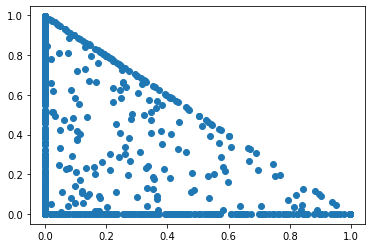

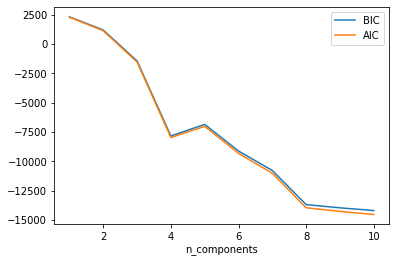

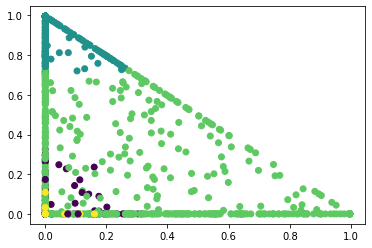



                                 Book Name  Label
0                        Uncle Tom_s Cabin      2
1               Anarchism and Other Essays      0
2                      Criminal Psychology      3
3  From the Caves and Jungles of Hindostan      3
4                    A Factor of Evolution      3


Accuracy for EM model with BOW and LDA :->  0.551
Kappa for EM model with BOW and LDA :->  0.43875
Homogeneity score for EM model with BOW and LDA  :->  0.36746933831433054
For n_clusters = 5 The average silhouette_score with LDA and BOW is : 0.2704760701189916


In [ ]:
#EM Alogrithim and LDA&BOW
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('LDA',LatentDirichletAllocation(n_components=5,random_state=7) ),
])        
X = pipeline.fit_transform(Data_)#.todense()
X = pd.DataFrame(X)
X=X.to_numpy()

plt.scatter(X[:,0], X[:,1])
plt.show()
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='spherical', random_state=7).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

gmm = GaussianMixture(n_components=5, covariance_type='spherical', random_state=7)
gmm.fit(X)

labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1], c=labels, cmap='viridis');
plt.show()
#print(gmm.predict_proba(data2D))
print("\n")
label(labels,names)
print("\n")

x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(2)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(1)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(3)
print("Accuracy for EM model with BOW and LDA :-> ",np.mean(labels == x))

print("Kappa for EM model with BOW and LDA :-> " , cohen_kappa_score(labels,x))

print("Homogeneity score for EM model with BOW and LDA  :-> " , homogeneity_score(x, labels))

silhouette_avg = silhouette_score(X , labels)
print("For n_clusters =", 5,
      "The average silhouette_score with LDA and BOW is :", silhouette_avg) # 0>> means overlapped clusters

#EM model with BOW,LDA and PCA

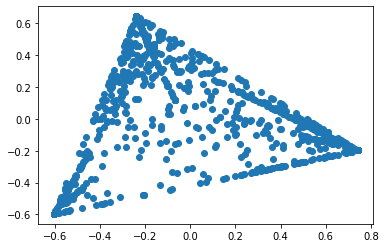

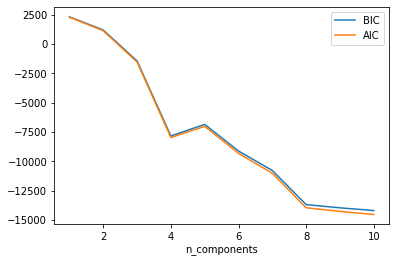

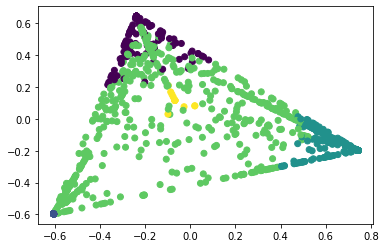



                                 Book Name  Label
0                        Uncle Tom_s Cabin      2
1               Anarchism and Other Essays      0
2                      Criminal Psychology      3
3  From the Caves and Jungles of Hindostan      3
4                    A Factor of Evolution      3


Accuracy for EM model with BOW and LDA and PCA :->  0.551
Kappa for EM model with BOW and LDA and PCA :->  0.43875
Homogeneity score for EM model with BOW and LDA and PCA :->  0.36746933831433054
For n_clusters = 5 The average silhouette_score with LDA and BOW is : 0.2704760701189916


In [ ]:
#EM model with BOW,LDA and PCA
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('LDA',LatentDirichletAllocation(n_components=5,random_state=7) ),
])        
X = pipeline.fit_transform(Data_)#.todense()
X = pd.DataFrame(X)
X=X.to_numpy()

pca = PCA(n_components=5).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='spherical', random_state=7).fit(data2D) for n in n_components]
plt.plot(n_components, [m.bic(data2D) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data2D) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

gmm = GaussianMixture(n_components=5,covariance_type='spherical', random_state=7)
gmm.fit(data2D)

labels = gmm.predict(data2D)
plt.scatter(data2D[:,0],data2D[:,1], c=labels, cmap='viridis');
plt.show()
#print(gmm.predict_proba(data2D))
print("\n")
label(labels,names)
print("\n")
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(2)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(1)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(3)
print("Accuracy for EM model with BOW and LDA and PCA :-> ",np.mean(labels == x))

print("Kappa for EM model with BOW and LDA and PCA :-> " , cohen_kappa_score(labels,x))

print("Homogeneity score for EM model with BOW and LDA and PCA :-> " , homogeneity_score(x, labels))
silhouette_avg = silhouette_score(X , labels)
print("For n_clusters =", 5,
      "The average silhouette_score with LDA and BOW is :", silhouette_avg)

#EM model with doc2vec


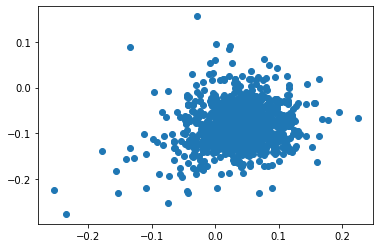

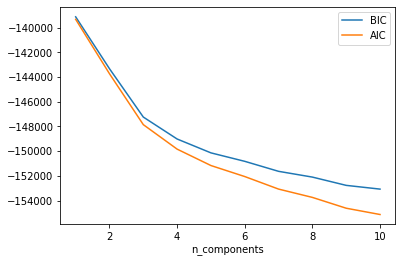

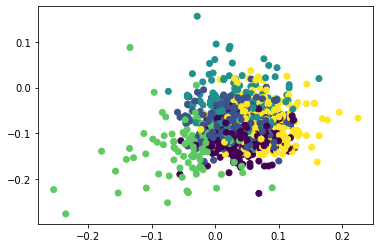



                                 Book Name  Label
0                        Uncle Tom_s Cabin      1
1               Anarchism and Other Essays      0
2                      Criminal Psychology      4
3  From the Caves and Jungles of Hindostan      1
4                    A Factor of Evolution      1
([[37, 72, 47, 3, 41]], [[59, 54, 12, 20, 55]], [[46, 45, 30, 32, 47]], [[33, 74, 31, 11, 51]], [[37, 58, 16, 42, 47]])


Accuracy for EM model with doc2vec :->  0.221
Kappa for EM model with doc2vec :->  0.026249999999999996
Homogeneity score for EM model with doc2vec :->  0.03172916536535891
For n_clusters = 5 The average silhouette_score with doc2vec is : 0.08156408


In [ ]:
#EM model with doc2vec
X = Xd2v
X = pd.DataFrame(X)
X=X.to_numpy()
#pca = PCA(n_components=5).fit(X)
#data2D = pca.transform(X)
plt.scatter(X[:,0], X[:,1])
plt.show()
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='spherical', random_state=7).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

gmm = GaussianMixture(n_components=5,covariance_type='spherical', random_state=7)
gmm.fit(X)

labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1], c=labels, cmap='viridis');
plt.show()
#print(gmm.predict_proba(data2D))
print("\n")
print(label(labels,names))
print("\n")
x=[]

yy = y.tolist()

for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(4)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(3)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(2)
  else :
    x.append(1)
print("Accuracy for EM model with doc2vec :-> ",np.mean(labels == x))

print("Kappa for EM model with doc2vec :-> " , cohen_kappa_score(labels,x))

print("Homogeneity score for EM model with doc2vec :-> " , homogeneity_score(x, labels))
silhouette_avg = silhouette_score(X , labels)
print("For n_clusters =", 5,
      "The average silhouette_score with doc2vec is :", silhouette_avg)


#Visualization

In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline


In [ ]:
# POS tag would not be sufficient for long span relations. We need dependency parsing as well!

def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
entity_pairs = []

for i in tqdm(Data_):
  entity_pairs.append(get_entities(i))

100%|██████████| 1000/1000 [00:33<00:00, 29.67it/s]


In [ ]:
entity_pairs[10:20]

[['missi jist', 'white finger sparkl lili'],
 ['sodidnt thar', 'em'],
 ['tom ye', 'busi natchez noth'],
 ['cloth comb hair', 'way  heart'],
 ['one  nervou', 'care'],
 ['pull cassi', 'laugh  push'],
 ['air young admir air teacher', 'scrawl'],
 ['powder magazin prudenc', 'virtu'],
 ['busi trip creatur', 'one place sunbeam summer'],
 ['fright hourli act shore', 'woman america thing']]

In [ ]:
#Get Relations
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
relations = [get_relation(i) for i in tqdm(Data_)]

100%|██████████| 1000/1000 [00:32<00:00, 30.90it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

said        50
say         20
see         17
know        11
make        10
take         9
let          8
found        8
seem         8
differ       6
seen         6
began        6
tell         6
feel         6
find         6
learn        6
heard        6
begin        6
remain       5
mean         5
think        5
ask          5
made         5
allow        5
left         5
die          5
come         5
appear       5
want         5
took         5
thought      4
felt         4
prove        4
depend       4
consider     4
larg         4
told         4
quit         4
prefer       4
explain      4
went         4
need         4
mention      4
play         4
shown        3
maintain     3
came         3
occur        3
pay          3
grow         3
dtype: int64

In [ ]:
# Let's build the KG
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

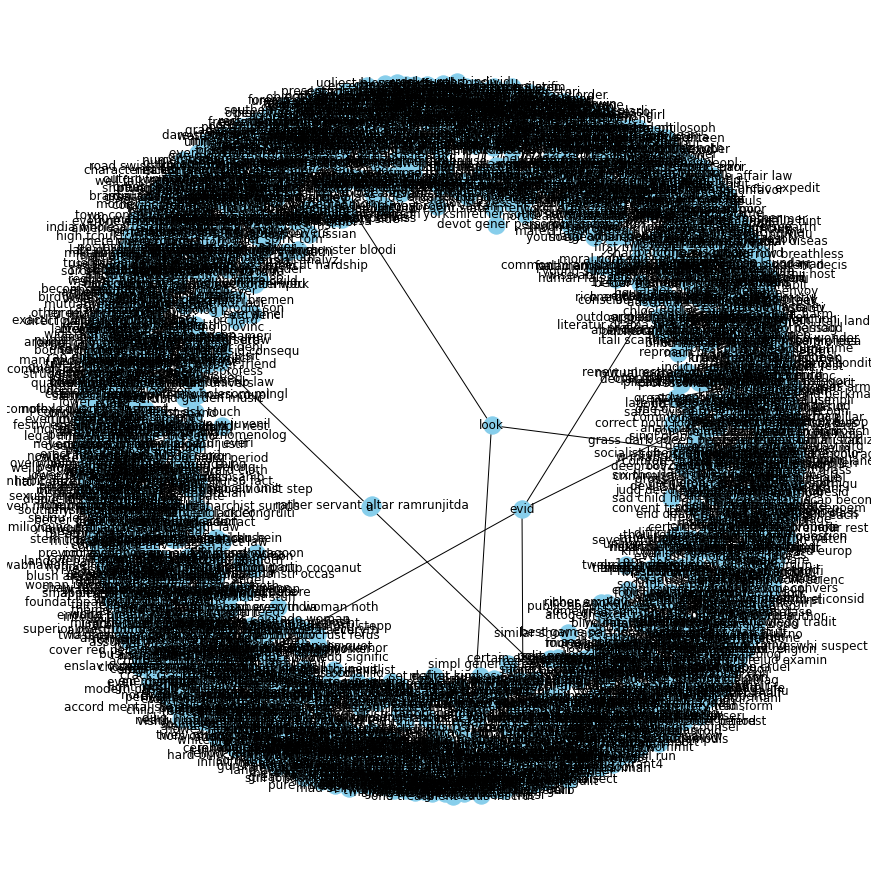

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

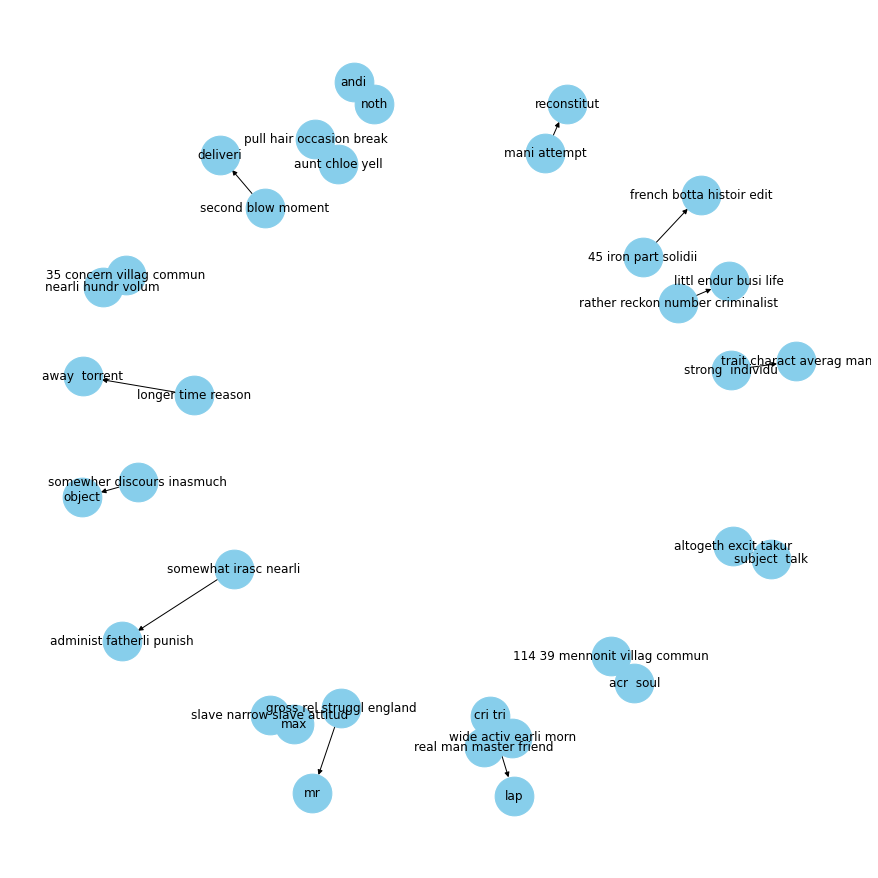

In [ ]:
# Let's filter by only important relations: Composed by
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="see"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G) # k regulates the distance between nodes , k = 0.5
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

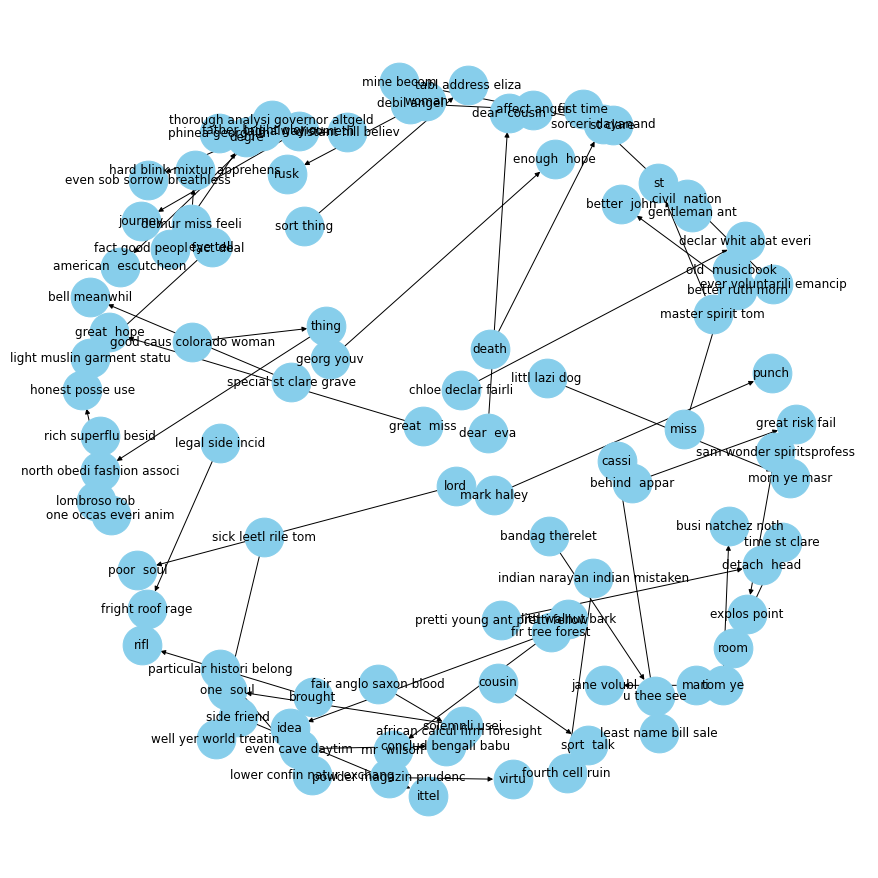

In [ ]:
# Let's filter by only important relations: written by
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="said"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

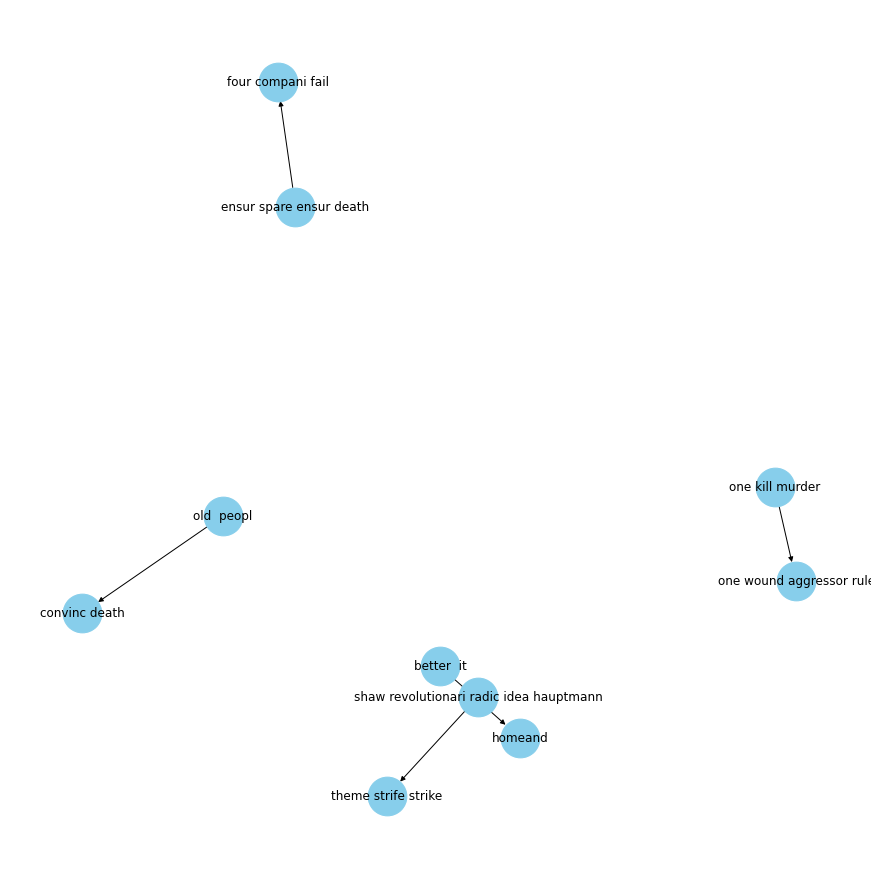

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="die"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**Error analysis**

Our champion model is agglomerative model with LDA  and BOW

LDA [2 0 2 2 3 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 3 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 0 2 3 2 2 2 2
 0 2 0 2 2 0 2 2 2 0 0 2 2 4 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 2 1 1 1 0 1 2 1 2 1 2 1 0 2 0 2 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 2 2 0 1 0 2 2 2 1 3 1 2 2 0 0 1 0 1 0 0
 1 0 0 1 2 1 1 0 4 1 0 0 0 0 0 0 0 2 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 2 0 2 0
 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 2 0 0 0 1 2 0 1 0 1 0 2 0 0 1 0 1
 0 1 1 0 1 1 1 1 2 0 1 4 1 0 1 0 1 1 2 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 2
 1 1 0 1 2 0 1 0 0 1 2 0 0 0 0 2 2 1 1 1 1 0 0 2 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 1 1 1 1 4 4 1 1 1 4 4 4 1 1 1 1
 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
 1 1 1 1 1 1 1 1 4 1 

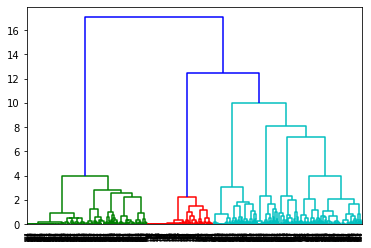

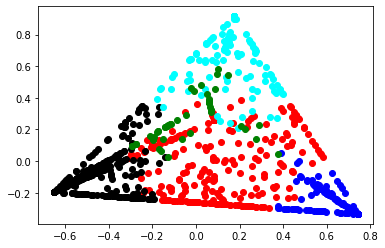



                                 Book Name  Label
0                        Uncle Tom_s Cabin      2
1               Anarchism and Other Essays      0
2                      Criminal Psychology      1
3  From the Caves and Jungles of Hindostan      3
4                    A Factor of Evolution      1
([[30, 0, 166, 3, 1]], [[88, 81, 28, 1, 2]], [[8, 172, 0, 0, 20]], [[49, 24, 3, 118, 6]], [[75, 82, 1, 8, 34]])


Accuracy AgglomerativeClustering model with  BOW and LDA campared by labels :->  0.578
Kappa for AgglomerativeClustering model with BOW and LDA :->  0.47250000000000003
For n_clusters = 5 The average silhouette_score with LDA and BOW is : 0.4641530724049276


In [ ]:
#______________________with LDA_____________________
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(LDA_out, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(LDA_out)
print("LDA",y_hc)
plt.show()
plt.scatter(LDA_2Dtransformed_data[y_hc ==0,0], LDA_2Dtransformed_data[y_hc == 0,1],  c='red')
plt.scatter(LDA_2Dtransformed_data[y_hc==1,0], LDA_2Dtransformed_data[y_hc == 1,1],  c='black')
plt.scatter(LDA_2Dtransformed_data[y_hc ==2,0], LDA_2Dtransformed_data[y_hc == 2,1], c='blue')
plt.scatter(LDA_2Dtransformed_data[y_hc ==3,0], LDA_2Dtransformed_data[y_hc == 3,1],  c='cyan')
plt.scatter(LDA_2Dtransformed_data[y_hc ==4,0], LDA_2Dtransformed_data[y_hc == 4,1],  c='green')
plt.show()

#_____________________
print("\n")
print(label(y_hc,names))
print("\n")
#__________________________

yy = y.tolist()
x=[]
for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(2)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(0)
  elif yy[i]=="Criminal Psychology":
    x.append(1)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(3)
  else :
    x.append(4)
print("Accuracy AgglomerativeClustering model with  BOW and LDA campared by labels :-> ",np.mean(y_hc == x))
print("Kappa for AgglomerativeClustering model with BOW and LDA :-> " , cohen_kappa_score(y_hc,x))

silhouette_avg = silhouette_score(LDA_out , y_hc)
print("For n_clusters =", 5,
      "The average silhouette_score with LDA and BOW is :", silhouette_avg) # 0>> means overlapped clusters

Tfidf [1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 0 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0 3 2 3 2 2 2 3 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 0 2
 0 2 2 2 2 2 2 2 0 

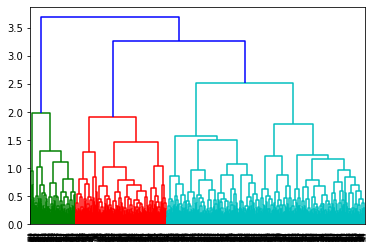

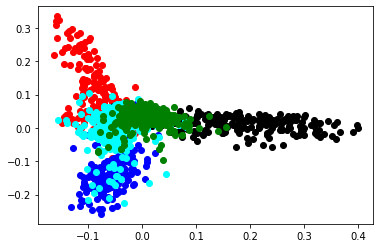



                                 Book Name  Label
0                        Uncle Tom_s Cabin      1
1               Anarchism and Other Essays      3
2                      Criminal Psychology      2
3  From the Caves and Jungles of Hindostan      4
4                    A Factor of Evolution      0
([[0, 191, 0, 1, 8]], [[0, 1, 4, 194, 1]], [[9, 0, 170, 20, 1]], [[1, 0, 2, 4, 193]], [[176, 2, 0, 19, 3]])


Accuracy AgglomerativeClustering model with  BOW and Tfidf campared by labels :->  0.924
Kappa for AgglomerativeClustering model with BOW and Tfidf :->  0.905
For n_clusters = 5 The average silhouette_score with tfidf and BOW is : 0.011698915391127393


In [ ]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#______________________with TFidf_____________________
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(Xd2v, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_train_tfidf)

print("Tfidf",y_hc)
plt.show()
plt.scatter(tfidf_2Dtransformed_data[y_hc ==0,0], tfidf_2Dtransformed_data[y_hc == 0,1],  c='red')
plt.scatter(tfidf_2Dtransformed_data[y_hc==1,0], tfidf_2Dtransformed_data[y_hc == 1,1],  c='black')
plt.scatter(tfidf_2Dtransformed_data[y_hc ==2,0], tfidf_2Dtransformed_data[y_hc == 2,1], c='blue')
plt.scatter(tfidf_2Dtransformed_data[y_hc ==3,0], tfidf_2Dtransformed_data[y_hc == 3,1],  c='cyan')
plt.scatter(tfidf_2Dtransformed_data[y_hc ==4,0], tfidf_2Dtransformed_data[y_hc == 4,1],  c='green')
plt.show()
#______________________
print("\n")
print(label(y_hc,names))
print("\n")
#__________________________
yy = y.tolist()
x=[]
for i in range(1000):

  if yy[i]=="Uncle Tom_s Cabin":
    x.append(1)
  elif yy[i]=="Anarchism and Other Essays":
    x.append(3)
  elif yy[i]=="Criminal Psychology":
    x.append(2)
  elif yy[i]=="From the Caves and Jungles of Hindostan":
    x.append(4)
  else :
    x.append(0)

print("Accuracy AgglomerativeClustering model with  BOW and Tfidf campared by labels :-> ",np.mean(y_hc == x))
print("Kappa for AgglomerativeClustering model with BOW and Tfidf :-> " , cohen_kappa_score(y_hc,x))

silhouette_avg = silhouette_score(X_train_tfidf , y_hc)
print("For n_clusters =", 5,
      "The average silhouette_score with tfidf and BOW is :", silhouette_avg) # 0>> means overlapped clusters

In [ ]:
X, y = merged_df["Partitions"],merged_df["Author"]
Mydf = pd.DataFrame(([xx,yy,zz] for xx, yy,zz in zip(X,y_hc,x)),columns = ["MPartitions","predicted","True"])
Mydf.to_csv("Mdata.csv")
ls=[]
for i in range(len(y_hc)):
  if Mydf['predicted'][i]!=Mydf['True'][i]:
    ls.append(i)
print(ls)
len(ls)

[4, 73, 80, 124, 130, 132, 158, 166, 188, 230, 247, 257, 337, 350, 374, 408, 412, 424, 425, 427, 431, 432, 438, 447, 468, 479, 481, 489, 498, 500, 503, 508, 513, 514, 533, 535, 540, 542, 554, 564, 568, 577, 578, 593, 597, 603, 656, 705, 720, 745, 780, 782, 810, 822, 824, 826, 829, 830, 832, 837, 857, 860, 872, 873, 875, 882, 894, 904, 940, 947, 950, 954, 958, 974, 982, 998]


76

# New Section

Case(1): predicted label for misclustered partition: 4 
True label for misclustered partition: 1 

Case(2): predicted label for misclustered partition: 2 
True label for misclustered partition: 3 

1st case [('around', 3), ('fountain', 3), ('flower', 3), ('galleri', 2), ('ran', 2), ('moorish', 2), ('arabesqu', 2), ('court', 2), ('threw', 2), ('silveri', 2), ('water', 2), ('marbl', 2), ('fragrant', 2), ('like', 2), ('surround', 2), ('turf', 2), ('leav', 2), ('jessamin', 2), ('bloom', 2), ('fragranc', 2), ('old', 2), ('wide', 1), ('four', 1), ('side', 1), ('whose', 1), ('arch', 1), ('slender', 1), ('pillar', 1), ('ornament', 1), ('carri', 1)]
2nd case [('place', 5), ('crimin', 5), ('would', 3), ('take', 2), ('least', 2), ('chang', 2), ('opportun', 2), ('hope', 2), ('liberti', 2), ('life', 2), ('prison', 2), ('long', 2), ('red', 2), ('patriot', 2), ('one', 2), ('effect', 1), ('insist', 1), ('right', 1), ('convict', 1), ('work', 1), ('meet', 1), ('brother', 1), ('organ', 1), ('aid', 1), ('

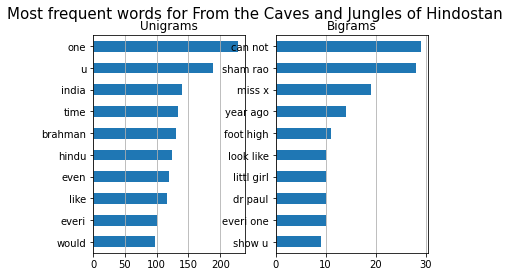

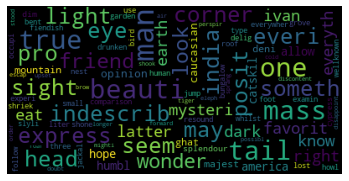

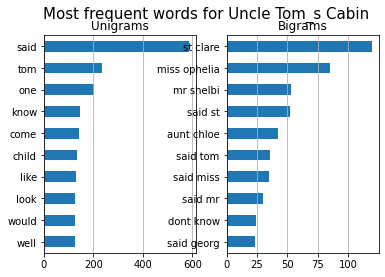

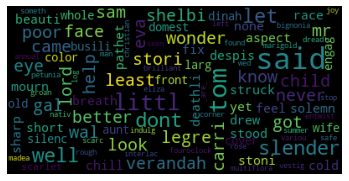

___________


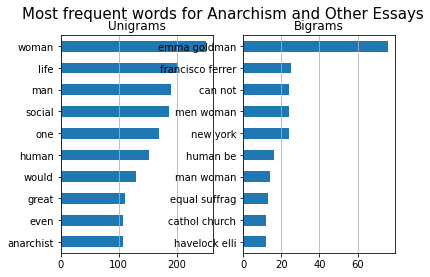

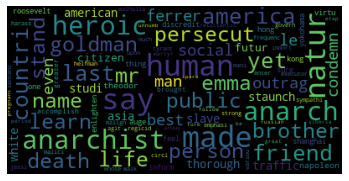

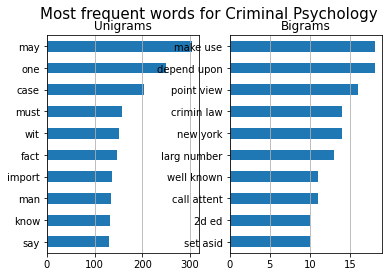

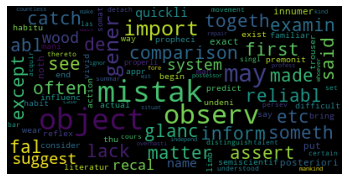

In [ ]:
print("Case(1): predicted label for misclustered partition:",Mydf['predicted'][4],"\nTrue label for misclustered partition:",Mydf['True'][4],"\n")
print("Case(2): predicted label for misclustered partition:",Mydf['predicted'][230],"\nTrue label for misclustered partition:",Mydf['True'][230],"\n")

#"1 " means it should be : Uncle Tom_s Cabin
#"4" =  From the Caves and Jungles of Hindostan
# It is predicted to be "From the Caves and Jungles of Hindostan" book, but it was actually: "Uncle Tom_s Cabin"
#"2" means it should be: " Criminal Psychology"      
#"3" means that it should be  "From the Caves and Jungles of Hindostan"
# It is predicted to be "From the Caves and Jungles of Hindostan" book, but it was actually: "From the Caves and Jungles of Hindostan"

#Getting most frequent words in the misclustered case
from collections import Counter
split_1 = Mydf['MPartitions'][4].split()
split_2 = Mydf['MPartitions'][230].split()

  
Counter_1 = Counter(split_1)
Counter_2 = Counter(split_2)

  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur_1 = Counter_1.most_common(30) 
print("1st case",most_occur_1)
most_occur_2 = Counter_2.most_common(30) 
print("2nd case",most_occur_2)

#Plotting most 10 frequent words in  "From the Caves and Jungles of Hindostan" Book:
Most_freq('From the Caves and Jungles of Hindostan')
Most_freq('Uncle Tom_s Cabin')
print("___________")
Most_freq('Anarchism and Other Essays')
Most_freq('Criminal Psychology')


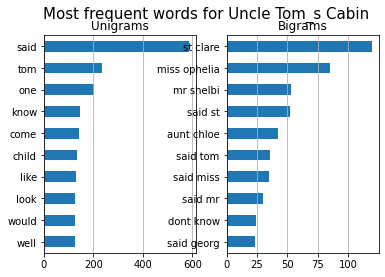

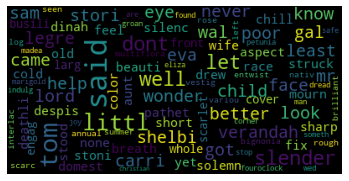

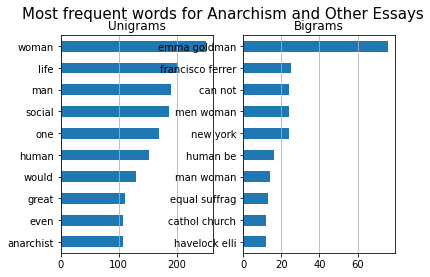

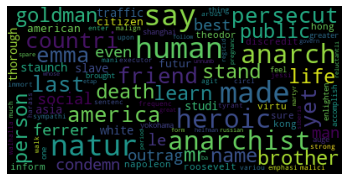

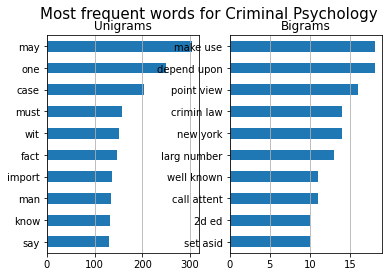

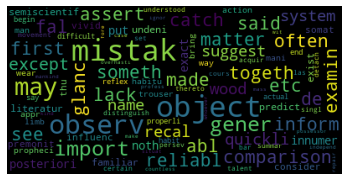

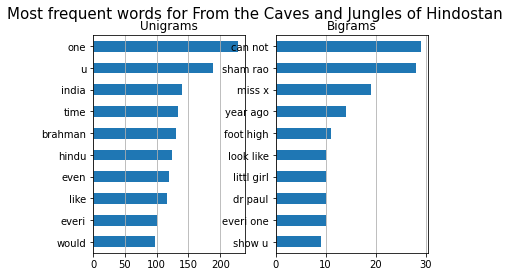

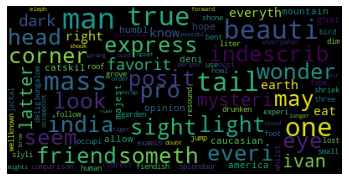

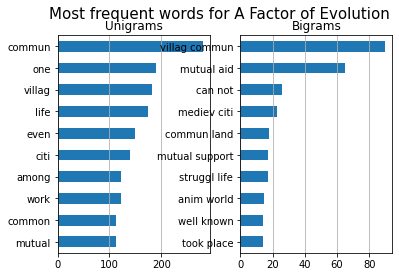

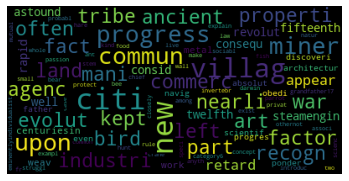

In [ ]:
Most_freq("Uncle Tom_s Cabin")
Most_freq('Anarchism and Other Essays')
Most_freq('Criminal Psychology')
Most_freq('From the Caves and Jungles of Hindostan')
Most_freq('A Factor of Evolution')
